In [292]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy.sparse import csc_array
import scipy.sparse.linalg as spla

import matplotlib.pyplot as plt
import matplotlib as mpl

# default parameters of the plot layout
plt.rcParams["text.usetex"] = True  # use latex
plt.rcParams["font.size"] = 13
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.constrained_layout.use"] = True

from qs_mps.applications.Z2.exact_hamiltonian import *
from qs_mps.sparse_hamiltonians_and_operators import *
from qs_mps.mps_class import MPS
from qs_mps.utils import anim, get_cx, get_cy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Ising Time Evolution

We evolve the ground state of a Ising Hamiltonian to another state, through a Quench, that is, the state to evolve is not an eigenstate of the Hamiltonian used as time evolving operator $U(t)$

In [293]:
L = 9
J = 1
h_t = 0.1
h_l = 1e-5

H_i = sparse_ising_hamiltonian(J=J, h_l=h_l, h_t=h_t, L=L, long="Z")
e, v = diagonalization(H_i, sparse=True)
psi0 = v[:,0]
(psi0.conjugate() @ psi0)

(1.0000000000000004+0j)

In [294]:
(psi0.conjugate() @ sparse_pauli_z(n=5, L=L) @ psi0)

(0.9987445074982522+0j)

In [295]:
flipped_state = sparse_pauli_x(n=L//2, L=L) @ psi0
flipped_state.conjugate() @ sparse_pauli_z(n=L//2, L=L) @ flipped_state
loc_mag_tot = []
loc_mag = np.zeros((L))
for i in range(L):
    loc_mag[i] = (flipped_state.conjugate() @ sparse_pauli_z(n=i, L=L) @ flipped_state).real
loc_mag_tot.append(loc_mag.copy())

In [319]:
product_state = np.zeros(2**L)
product_state[0] = 1
flipped_state = sparse_pauli_x(n=L//2, L=L) @ product_state
flipped_state.conjugate() @ sparse_pauli_z(n=L//2, L=L) @ flipped_state
loc_mag_tot = []
loc_mag = np.zeros((L))
for i in range(L):
    loc_mag[i] = (flipped_state.conjugate() @ sparse_pauli_z(n=i, L=L) @ flipped_state).real
loc_mag_tot.append(loc_mag.copy())
print(loc_mag)

[ 1.  1.  1.  1. -1.  1.  1.  1.  1.]


## Test of operators - no trotter error

In [271]:
delta = 0.01
steps = 10
H_ev = sparse_ising_hamiltonian(J=0, h_l=0, h_t=1, L=L)
U_trans = spla.expm(-1j*delta*H_ev)
psi_ev_trott = psi0.copy()

ex_sp = []
for trott in range(steps):
    U_ev = spla.expm(-1j*delta*(trott+1)*H_ev)
    psi_ev_ex = U_ev @ psi0

    psi_ev_trott = U_trans @ psi_ev_trott
    ex_sp.append(psi_ev_ex.conjugate() @ psi_ev_trott)

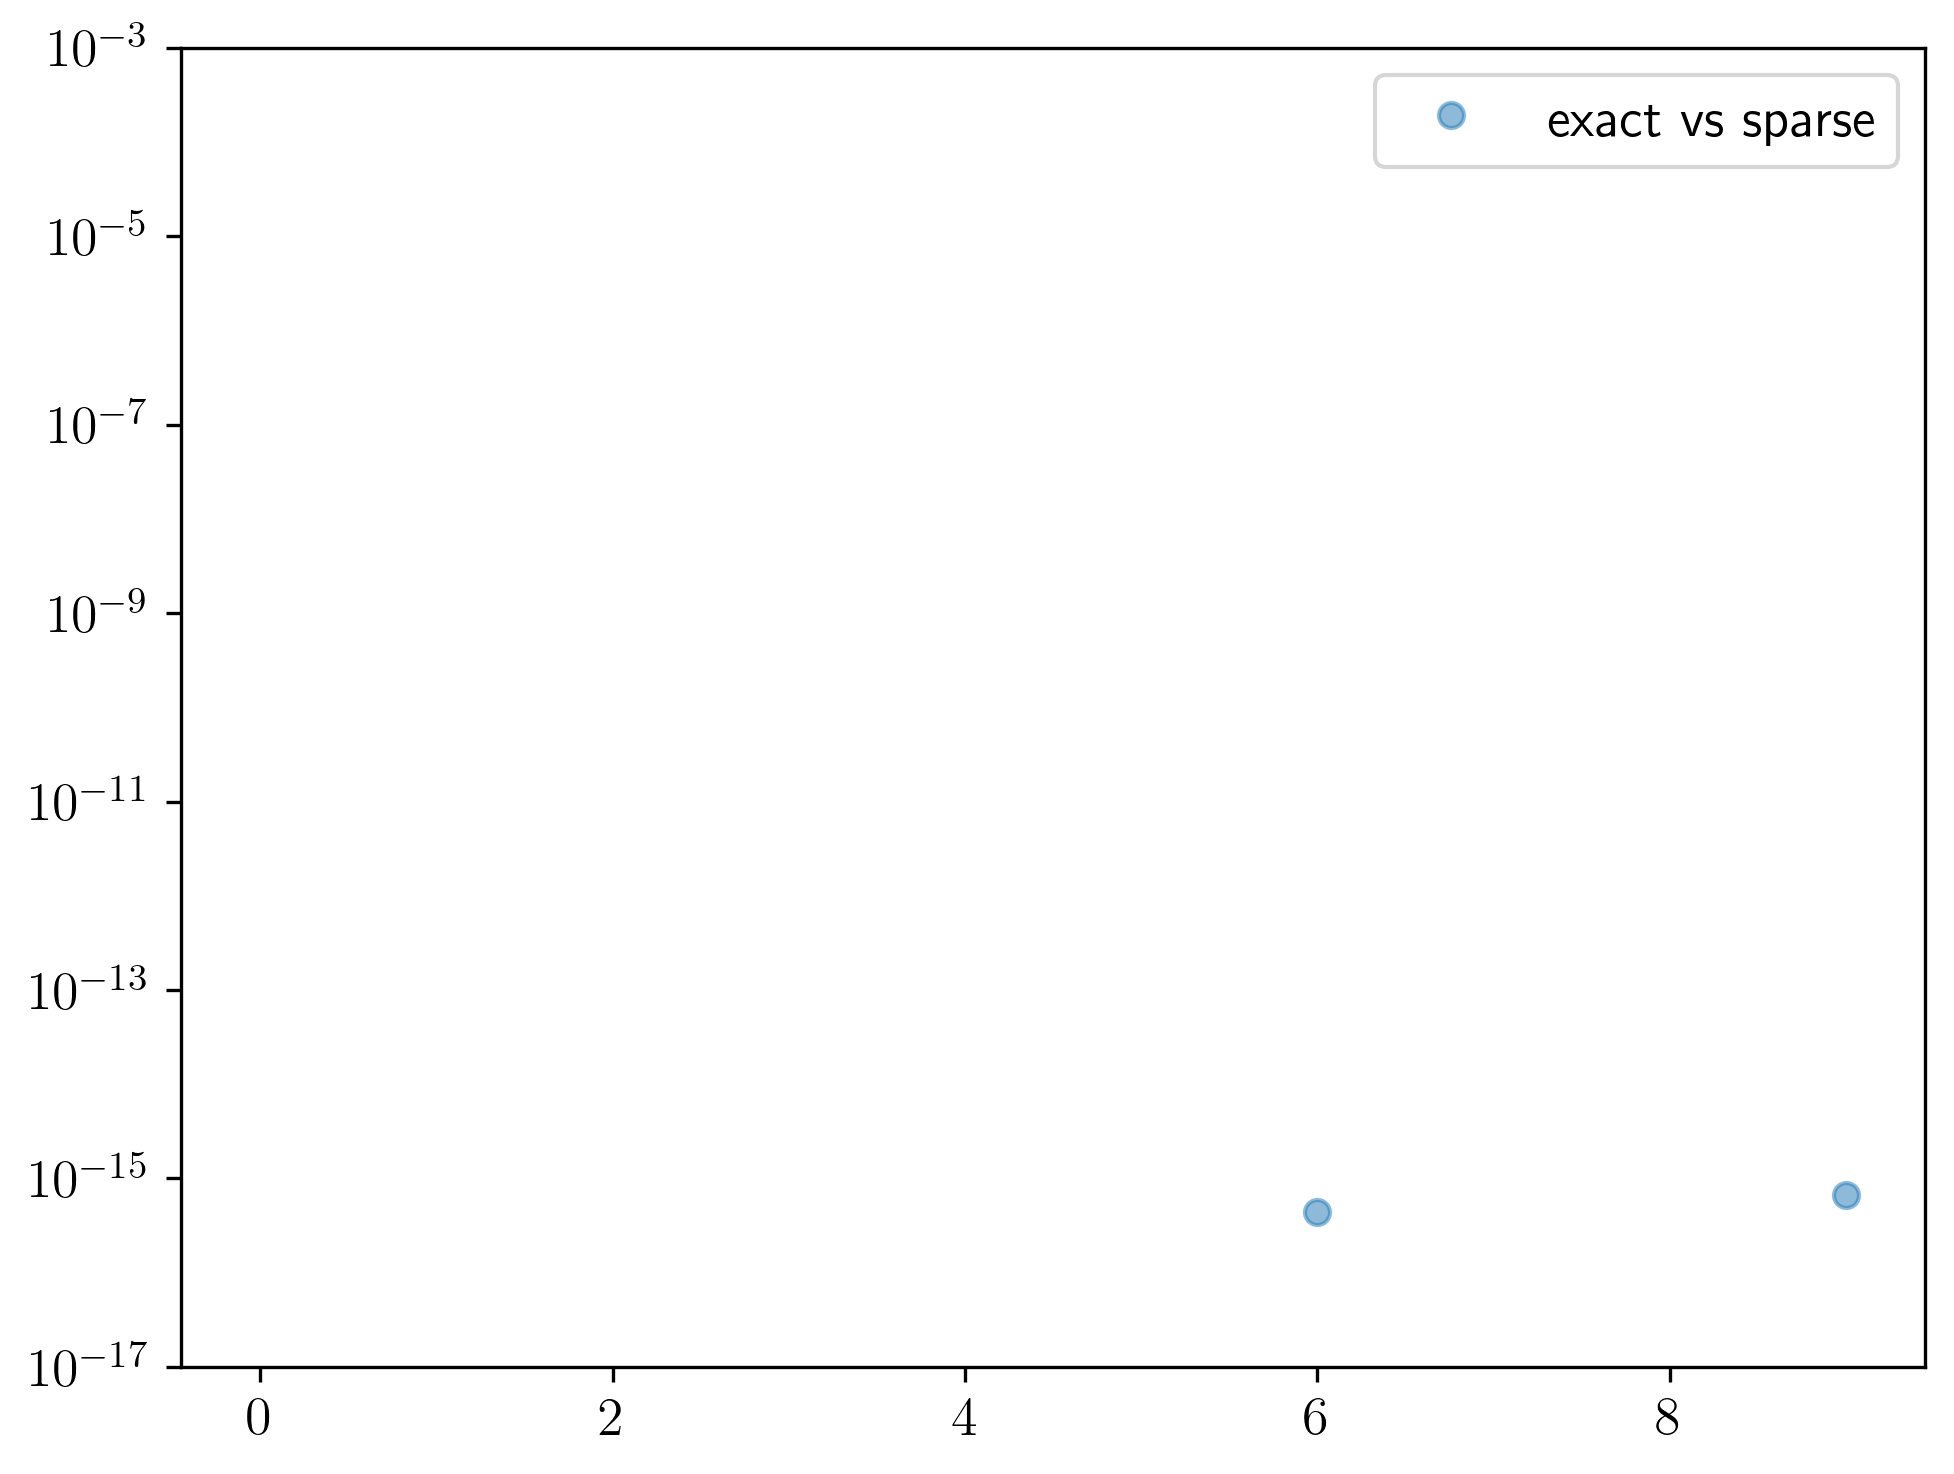

In [5]:
plt.plot([1-(ex_sp[i].real**2+ex_sp[i].imag**2) for i in range(steps)], marker='o', linestyle="", alpha=0.5, label="exact vs sparse")
plt.yscale("log")
plt.ylim(top=1e-3, bottom=1e-17)
plt.legend()

## Test of operators - trotter error

In [320]:
delta = 0.01
steps = 200
J_ev, h_ev = 1, 1
U_trott = trott_ising(L=L, J=J_ev, h=h_ev, delta=delta, ord=2)
psi_ev_trott = flipped_state.copy()

ex_sp = []
for trott in range(steps):
    print(f"Trotter step: {trott}")
    U_ev = spla.expm(-1j*delta*(trott+1)*H_ev)
    psi_ev_ex = U_ev @ flipped_state

    psi_ev_trott = U_trott @ psi_ev_trott
    ex_sp.append(psi_ev_ex.conjugate() @ psi_ev_trott)
    loc_mag[:] = 0
    for i in range(L):
        loc_mag[i] = psi_ev_trott.conjugate() @ sparse_pauli_z(n=i, L=L) @ psi_ev_trott
    loc_mag_tot.append(loc_mag.copy())

Trotter step: 0


C:\Users\HP\AppData\Local\Temp\ipykernel_25872\2562267220.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  loc_mag[i] = psi_ev_trott.conjugate() @ sparse_pauli_z(n=i, L=L) @ psi_ev_trott


Trotter step: 1
Trotter step: 2
Trotter step: 3
Trotter step: 4
Trotter step: 5
Trotter step: 6
Trotter step: 7
Trotter step: 8
Trotter step: 9
Trotter step: 10
Trotter step: 11
Trotter step: 12
Trotter step: 13
Trotter step: 14
Trotter step: 15
Trotter step: 16
Trotter step: 17
Trotter step: 18
Trotter step: 19
Trotter step: 20
Trotter step: 21
Trotter step: 22
Trotter step: 23
Trotter step: 24
Trotter step: 25
Trotter step: 26
Trotter step: 27
Trotter step: 28
Trotter step: 29
Trotter step: 30
Trotter step: 31
Trotter step: 32
Trotter step: 33
Trotter step: 34
Trotter step: 35
Trotter step: 36
Trotter step: 37
Trotter step: 38
Trotter step: 39
Trotter step: 40
Trotter step: 41
Trotter step: 42
Trotter step: 43
Trotter step: 44
Trotter step: 45
Trotter step: 46
Trotter step: 47
Trotter step: 48
Trotter step: 49
Trotter step: 50
Trotter step: 51
Trotter step: 52
Trotter step: 53
Trotter step: 54
Trotter step: 55
Trotter step: 56
Trotter step: 57
Trotter step: 58
Trotter step: 59
Trotte

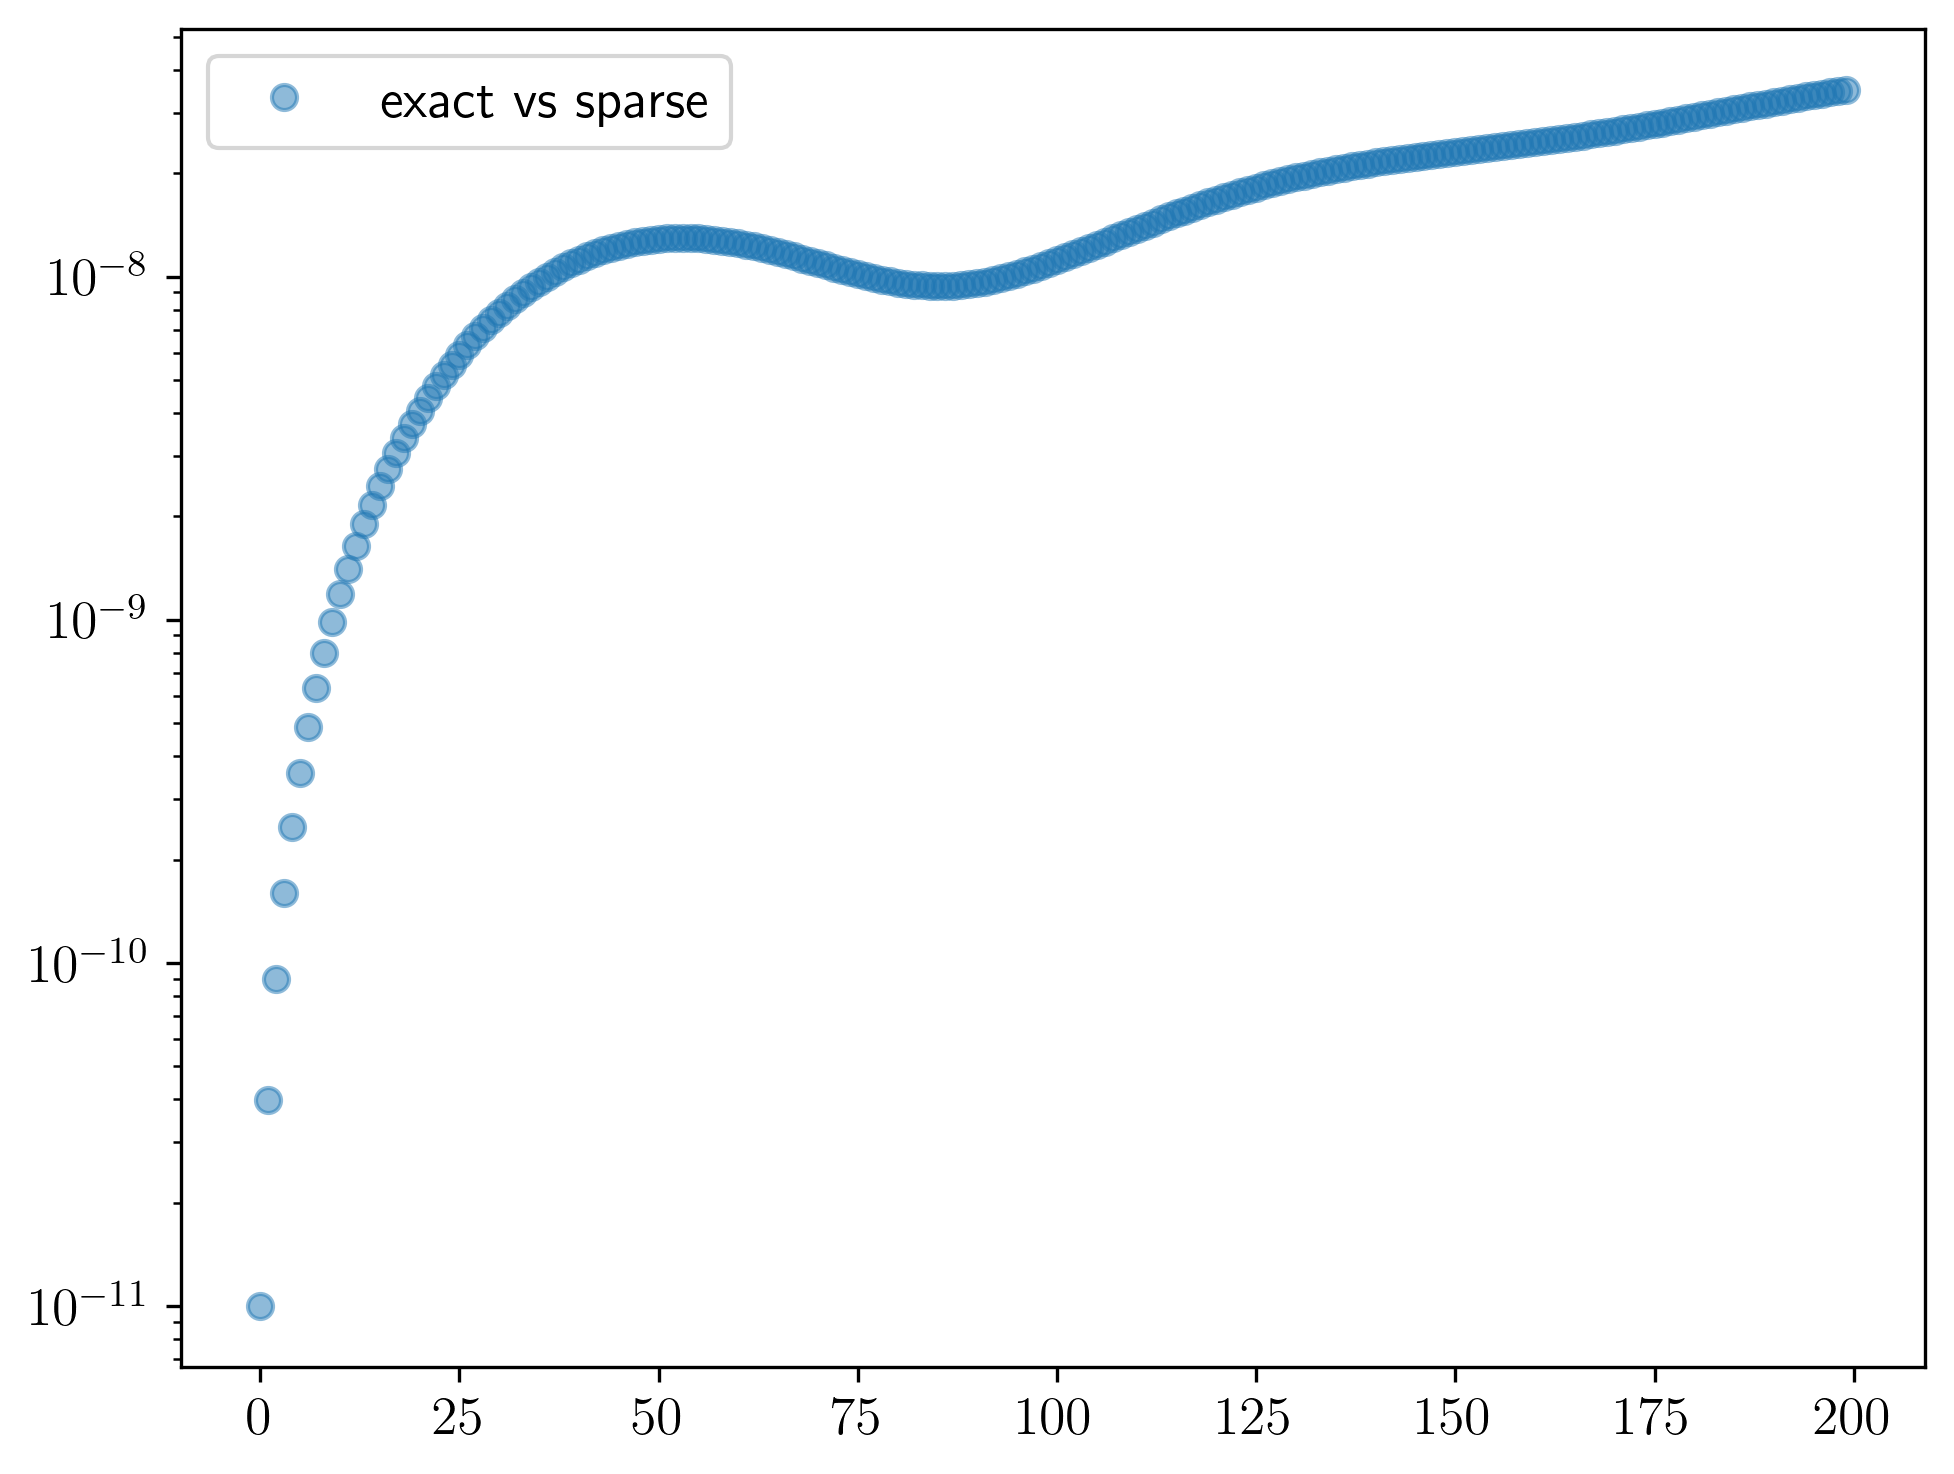

In [321]:
plt.plot([1-(ex_sp[i].real**2+ex_sp[i].imag**2) for i in range(steps)], marker='o', linestyle="", alpha=0.5, label="exact vs sparse")
plt.yscale("log")
# plt.ylim(top=1e1, bottom=1e-8)
# plt.hlines(y=delta**3*steps, xmin=0, xmax=steps, linestyles="--", linewidth=1, alpha=0.8, color="red", label="$O(\\delta^3 T)$")
plt.legend()

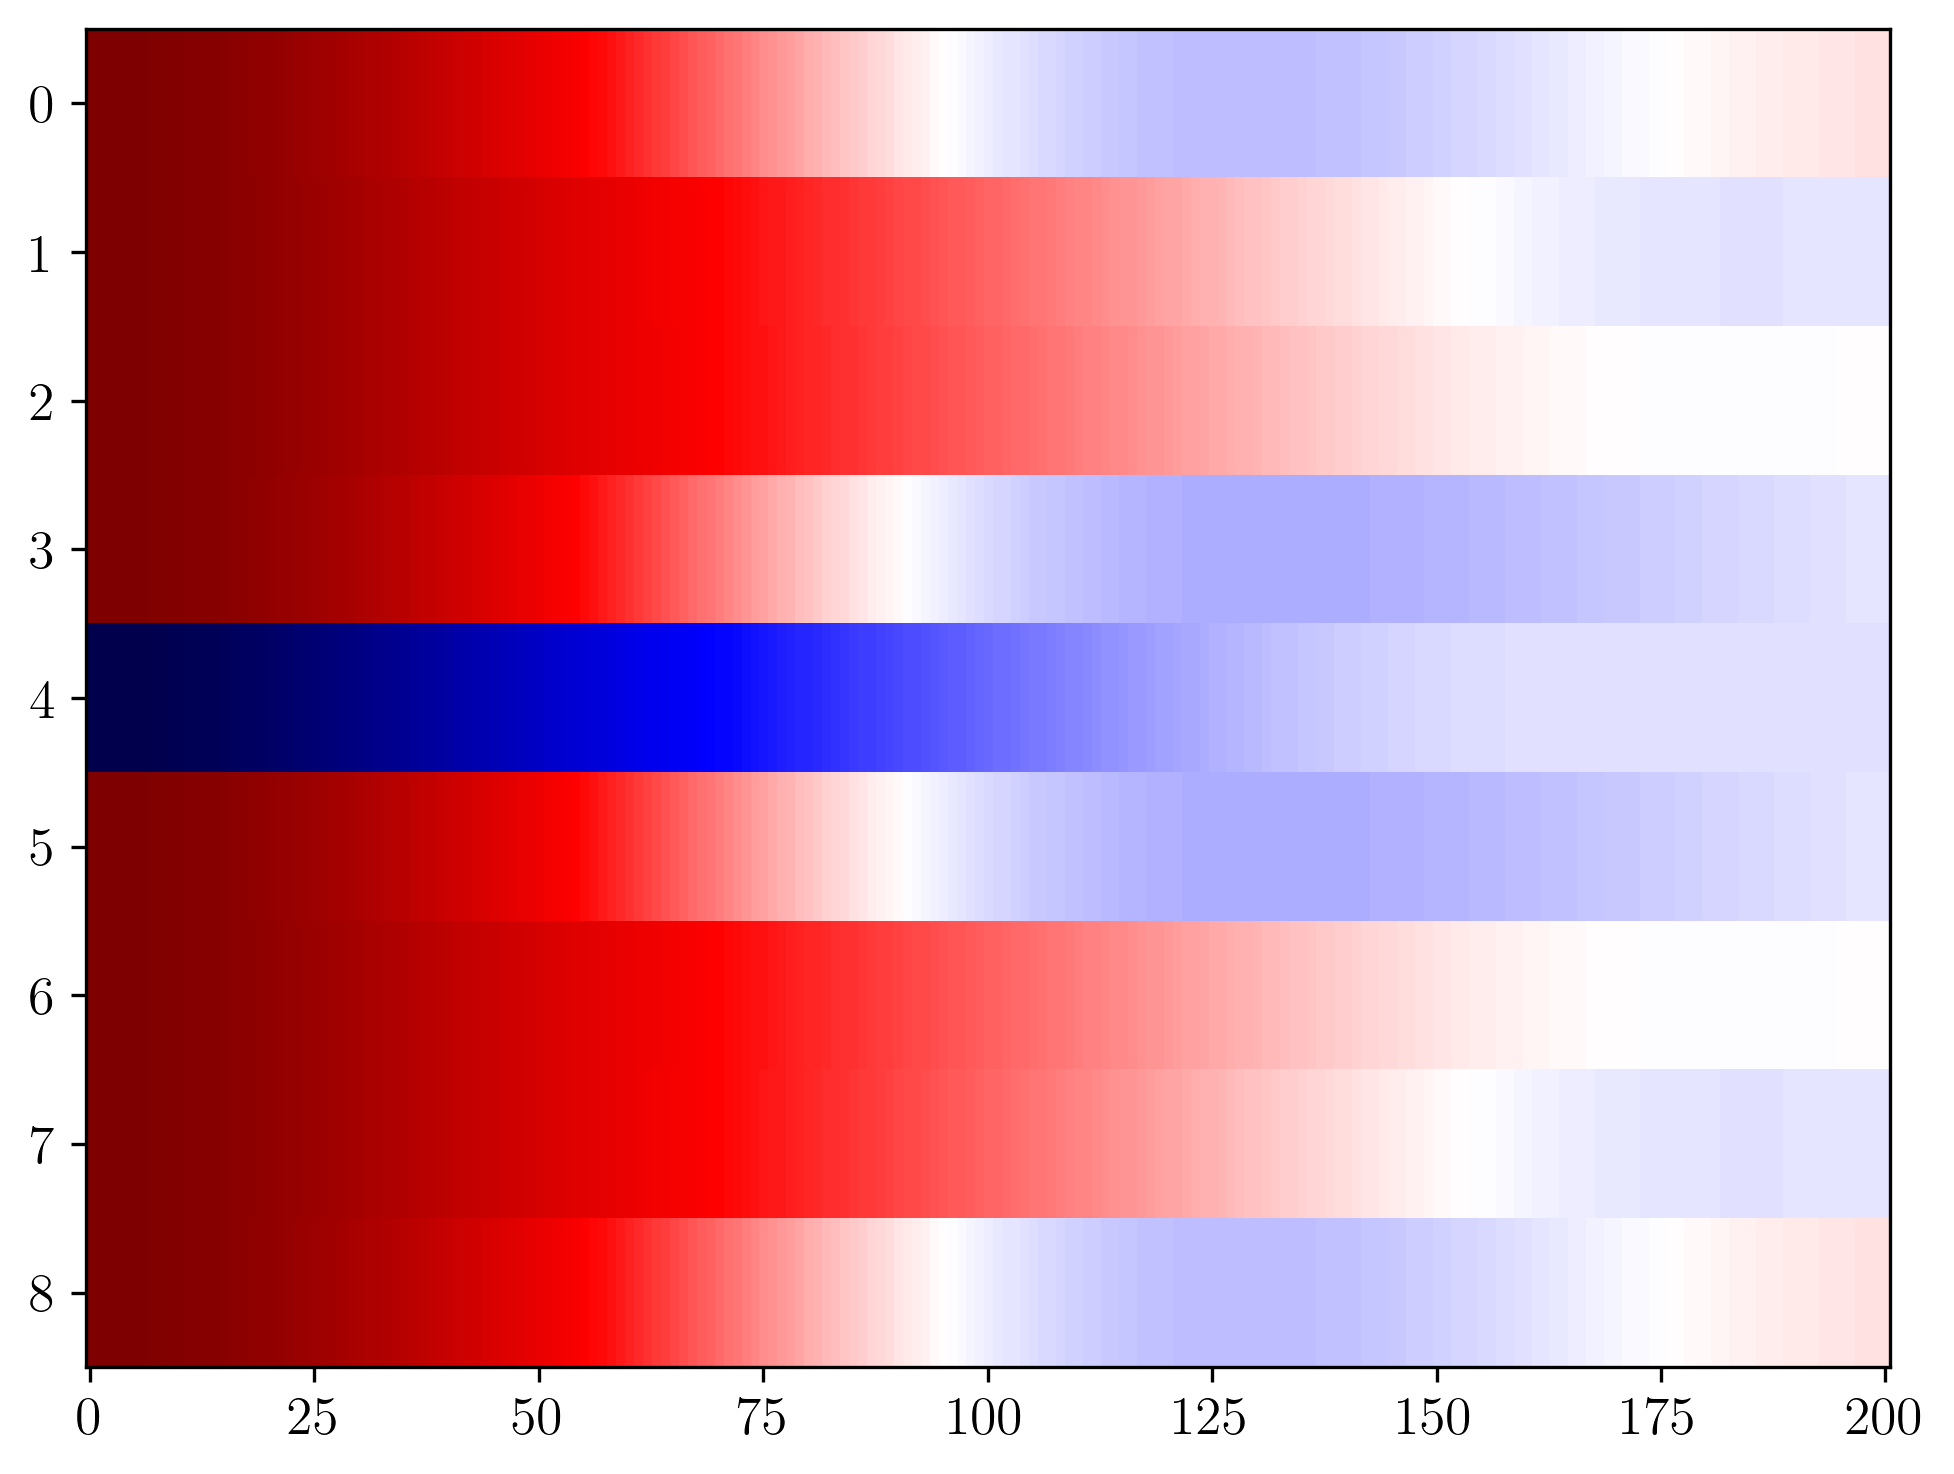

In [ ]:
plt.imshow(np.asarray(loc_mag_tot).reshape(steps+1,9).T, aspect='auto', cmap="seismic")


## TEBD with variational compression

Initialize the MPS to find the ground state through DMRG

In [10]:
L = 4
d = 2
model = "Ising"
J = 1
h_t = 1e-7
h_l = 0
chi = 50

ising_chain = MPS(L=L, d=d, model=model, chi=chi, J=J, h=h_t, eps=h_l)
ising_chain._random_state(seed=3, type_shape="rectangular", chi=chi)
ising_chain.canonical_form()
ising_chain.DMRG(trunc_chi=True, trunc_tol=False, where=L//2, long="Z", trans="X")
ising_chain.check_canonical(site=1)

Sweep n: 0

Sweep n: 1

the tensor at site 4 is in the correct RFC
the tensor at site 3 is in the correct RFC
the tensor at site 2 is in the correct RFC


In [11]:
ising_chain.order_param()
ising_chain.mpo_first_moment()

array(-4.+0.j)

In [12]:
delta = 0.01
steps = 50
ex_sp, ex_mps, mps_sp = ising_chain.TEBD_variational_Ising_debug(trotter_steps=steps, delta=delta, h_ev=h_ev, J_ev=J_ev, where=L//2)


## Norm of psi0_mps:  (1.0000000000000009+0j)

## Norm of psi0_ex:  (1.0000000000000002+0j)

## Norm of psi0_sp:  (1.0000000000000002+0j)
------ Trotter steps: 0 -------
Bond dim site: 4
Sweep n: 0

Sweep n: 1

##############################
The error between the two last updated states converged
to an order of 1e-12 after:
1 sweeps at site 3
total iterations 7
##############################
MPO matches the sparse matrix representation!
the tensor at site 4 is in the correct RFC
the tensor at site 3 is in the correct RFC
the tensor at site 2 is in the correct RFC
Difference for exact: 6.531531753670423e-06
------ Trotter steps: 1 -------
Bond dim site: 4
Sweep n: 0

Sweep n: 1

##############################
The error between the two last updated states converged
to an order of 1e-12 after:
1 sweeps at site 3
total iterations 7
##############################
MPO matches the sparse matrix representation!
the tensor at site 4 is in the correct RFC
the tensor at site 3 is in the correct 

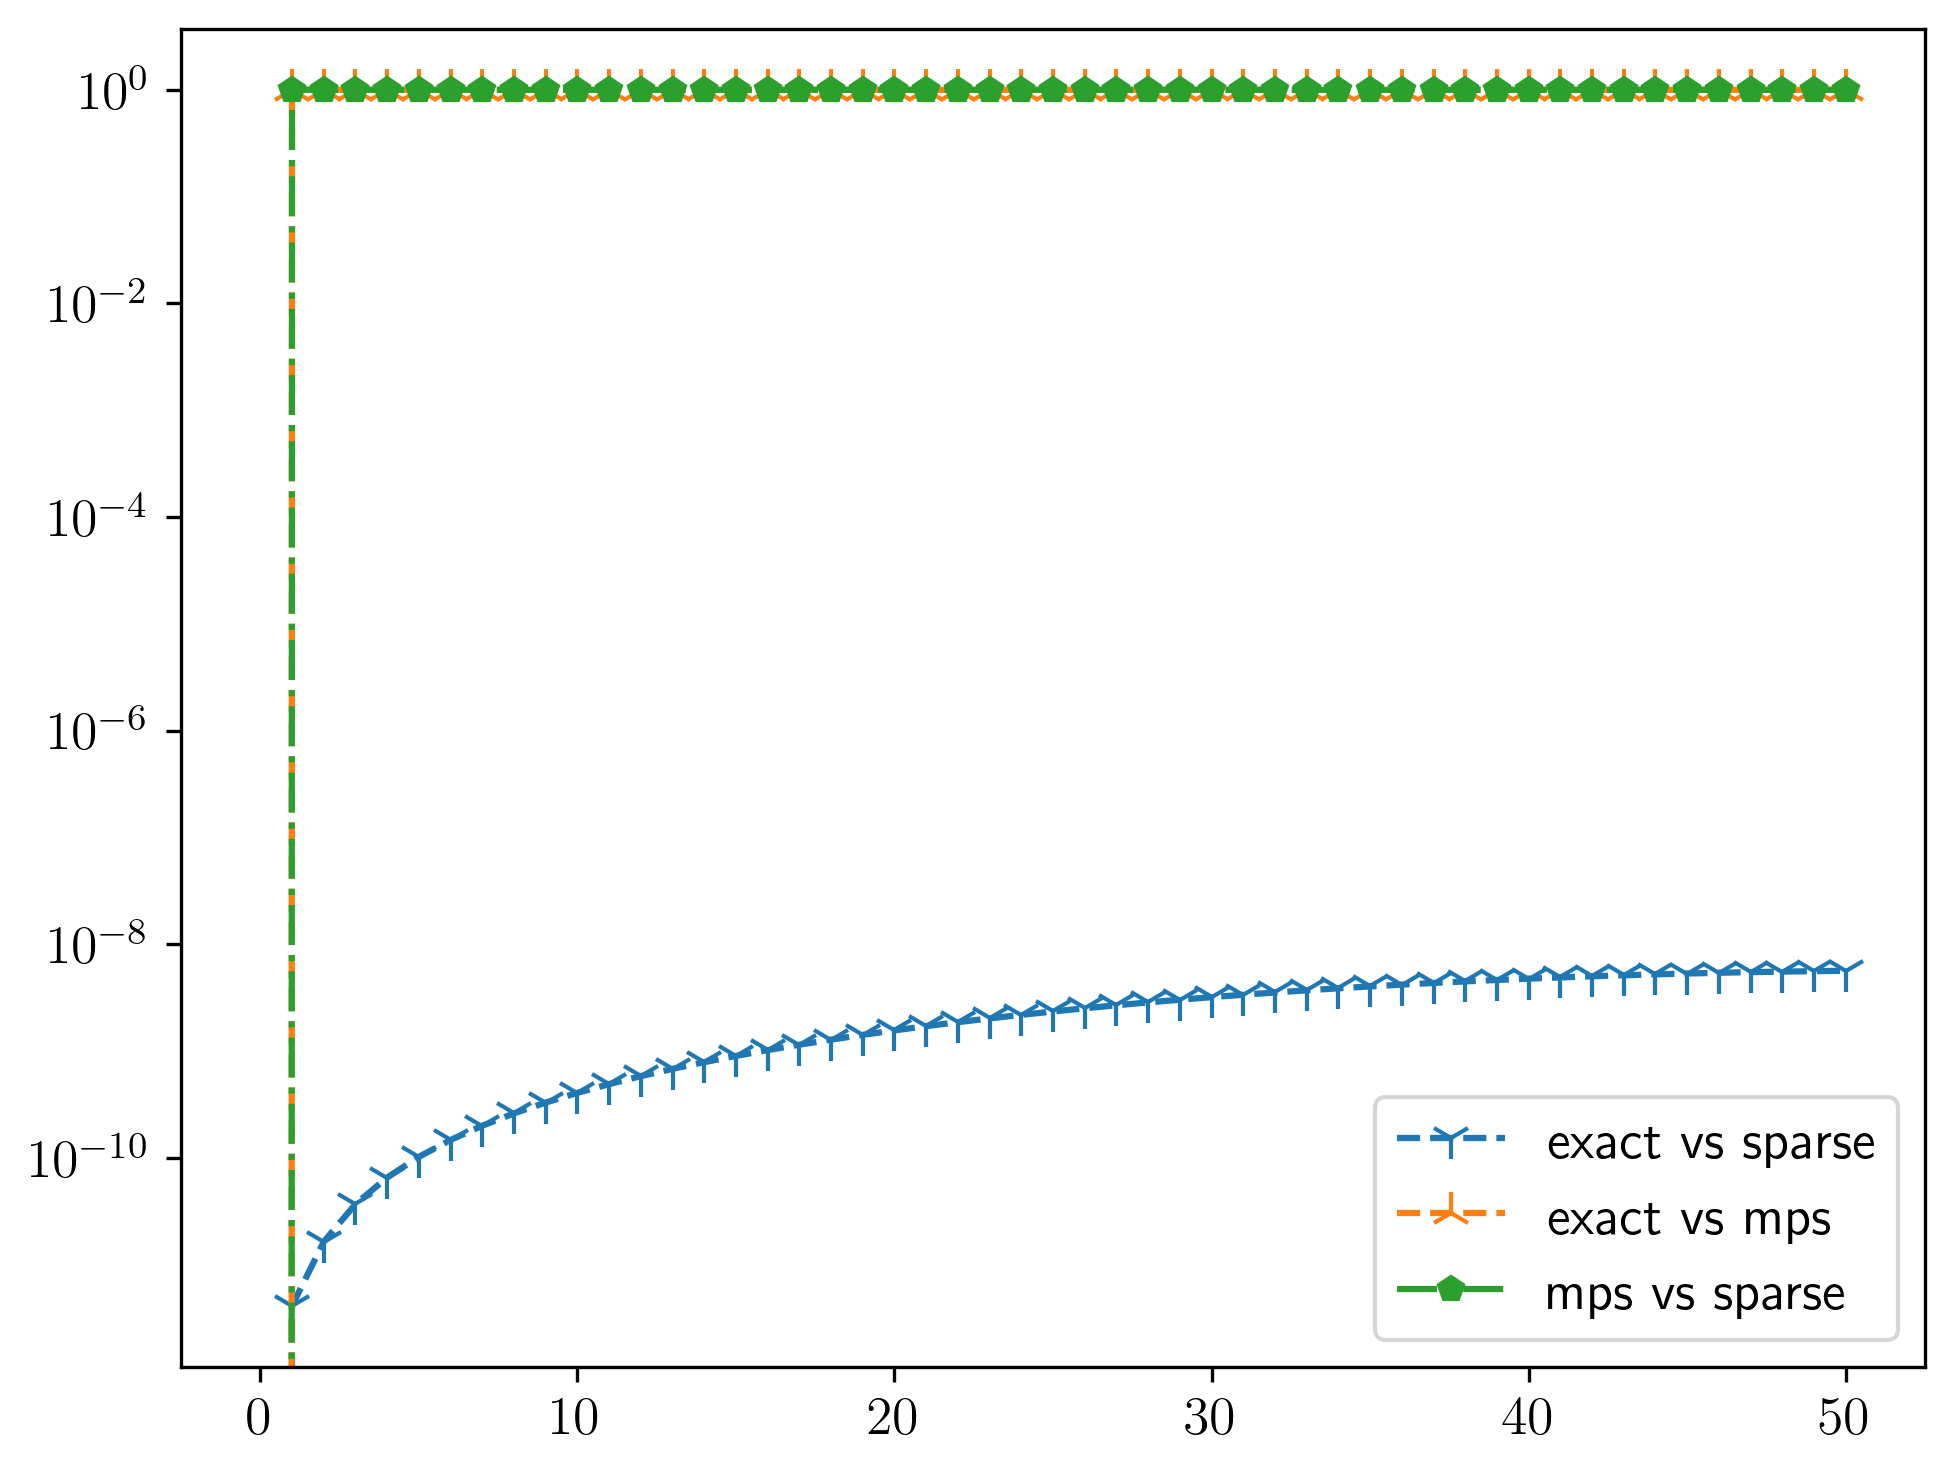

In [13]:
plt.plot([1-(ex_sp[i].real**2+ex_sp[i].imag**2) for i in range(steps+1)], linestyle='--', marker='1', markersize=10, label="exact vs sparse")
plt.plot([1-(ex_mps[i].real**2+ex_mps[i].imag**2) for i in range(steps+1)], linestyle='--', marker='2', markersize=10, label="exact vs mps")
plt.plot([1-(mps_sp[i].real**2+mps_sp[i].imag**2) for i in range(steps+1)], linestyle='-.', marker='p', label="mps vs sparse")
plt.yscale("log")
plt.legend()

In [12]:
ising_chain.mpo_Ising_quench_global(delta=delta, h_ev=h_ev, J_ev=J_ev)
ising_ev_mpo = ising_chain.w.copy()
matrix_ising_ev_mpo = mpo_to_matrix(ising_ev_mpo)
matrix_ising_ev_mpo.shape

(16, 16)

In [13]:
difference = np.linalg.norm(matrix_ising_ev_mpo - U_trott.toarray())
if difference < 1e-10:  # Threshold for numerical precision
    print("MPO matches the sparse matrix representation!")
else:
    print(f"Mismatch found! Difference: {difference}")

MPO matches the sparse matrix representation!


### Debug Ising ev mpo

In [14]:
I = np.eye(2)
O = np.zeros((2, 2))
X = np.array([[0, 1], [1, 0]])
Z = np.array([[1, 0], [0, -1]])
w_tot_int = []
w_tot_loc = []
w_loc = np.array(spla.expm(1j * h_ev * delta / 2 * X)).reshape((1,1,2,2))

w_left = np.array([[np.sqrt(np.cos(delta*J_ev))*I,1j*np.sqrt(np.sin(delta*J_ev))*Z]])
w_right = np.array([[np.sqrt(np.cos(delta*J_ev))*I],[np.sqrt(np.sin(delta*J_ev))*Z]])
w_bulk = np.array([[np.cos(delta*J_ev)*I        ,       1J*np.sqrt(np.sin(delta*J_ev)*np.cos(delta*J_ev))*Z],
                   [np.sqrt(np.sin(delta*J_ev)*np.cos(delta*J_ev))*Z     ,       1j*np.sin(delta*J_ev)*I]])
print(w_left.shape, w_right.shape, w_bulk.shape, w_loc.shape)

for site in range(L):
    if site == 0:
        w_tot_int.append(w_left)
    elif site == L-1:
        w_tot_int.append(w_right)
    else:
        w_tot_int.append(w_bulk)
    w_tot_loc.append(w_loc)

matrix_int_mpo = mpo_to_matrix(w_tot_int)
matrix_loc_mpo = mpo_to_matrix(w_tot_loc)

(1, 2, 2, 2) (2, 1, 2, 2) (2, 2, 2, 2) (1, 1, 2, 2)


In [15]:
J_ev, h_ev = 1, 1
H_ev = sparse_ising_hamiltonian(J=J_ev, h_l=0, h_t=h_ev, L=L, long="Z")
H_ev_loc = sparse_ising_hamiltonian(J=0, h_l=0, h_t=h_ev, L=L, long="Z")
U_loc = spla.expm(-1j*delta/2*H_ev_loc)
H_ev_int = sparse_ising_hamiltonian(J=J_ev, h_l=0, h_t=0, L=L, long="Z")
U_int = spla.expm(-1j*delta*H_ev_int)
U_trott = U_loc @ U_int @ U_loc

In [16]:
difference = np.linalg.norm(matrix_int_mpo - U_int.toarray())
if difference < 1e-10:  # Threshold for numerical precision
    print("MPO matches the sparse matrix representation!")
else:
    print(f"Mismatch found! Difference: {difference}")

MPO matches the sparse matrix representation!


In [17]:
difference = np.linalg.norm(matrix_loc_mpo - U_loc.toarray())
if difference < 1e-10:  # Threshold for numerical precision
    print("MPO matches the sparse matrix representation!")
else:
    print(f"Mismatch found! Difference: {difference}")

MPO matches the sparse matrix representation!


In [18]:
difference = np.linalg.norm(matrix_int_mpo - U_int.toarray())
if difference < 1e-10:  # Threshold for numerical precision
    print("MPO matches the sparse matrix representation!")
else:
    print(f"Mismatch found! Difference: {difference}")

MPO matches the sparse matrix representation!


Ising defect

In [19]:
L = 11
H_ev = sparse_ising_hamiltonian(J=1, h_t=0.1, h_l=0, L=L, long="Z")
psi0 = np.zeros((2**L,1))
psi0[0] = 1
M = sparse_magnetization(L=L, op = "Z")
print(psi0.T.conjugate() @ M @ psi0)

loc_mag = []
for i in range(L):
    loc_mag.append(psi0.T.conjugate() @ sparse_pauli_z(n=i, L=L) @ psi0)

print(loc_mag)

flip_state = sparse_pauli_x(n=L//2, L=L) @ psi0

loc_mag = []
for i in range(L):
    loc_mag.append(flip_state.T.conjugate() @ sparse_pauli_z(n=i, L=L) @ flip_state)

print(loc_mag)


[[1.+0.j]]
[array([[1.+0.j]]), array([[1.+0.j]]), array([[1.+0.j]]), array([[1.+0.j]]), array([[1.+0.j]]), array([[1.+0.j]]), array([[1.+0.j]]), array([[1.+0.j]]), array([[1.+0.j]]), array([[1.+0.j]]), array([[1.+0.j]])]
[array([[1.+0.j]]), array([[1.+0.j]]), array([[1.+0.j]]), array([[1.+0.j]]), array([[1.+0.j]]), array([[-1.+0.j]]), array([[1.+0.j]]), array([[1.+0.j]]), array([[1.+0.j]]), array([[1.+0.j]]), array([[1.+0.j]])]


In [20]:
trotter_steps = 100
delta = 0.01
psi_ev = flip_state.copy()

for T in range(trotter_steps):
    print(f"trotter step: {T+1}")
    t = (T+1) * delta
    # U = evolution_operator(t, H_ev)
    psi_ev = spla.expm_multiply(-1j * t * H_ev, psi_ev)    
    # psi_ev = U @ psi_ev
    for i in range(L):
        loc_mag.append(psi_ev.T.conjugate() @ sparse_pauli_z(n=i, L=L) @ psi_ev)

trotter step: 1
trotter step: 2
trotter step: 3
trotter step: 4
trotter step: 5
trotter step: 6
trotter step: 7
trotter step: 8
trotter step: 9
trotter step: 10
trotter step: 11
trotter step: 12
trotter step: 13
trotter step: 14
trotter step: 15
trotter step: 16
trotter step: 17
trotter step: 18
trotter step: 19
trotter step: 20
trotter step: 21
trotter step: 22
trotter step: 23
trotter step: 24
trotter step: 25
trotter step: 26
trotter step: 27
trotter step: 28
trotter step: 29
trotter step: 30
trotter step: 31
trotter step: 32
trotter step: 33
trotter step: 34
trotter step: 35
trotter step: 36
trotter step: 37
trotter step: 38
trotter step: 39
trotter step: 40
trotter step: 41
trotter step: 42
trotter step: 43
trotter step: 44
trotter step: 45
trotter step: 46
trotter step: 47
trotter step: 48
trotter step: 49
trotter step: 50
trotter step: 51
trotter step: 52
trotter step: 53
trotter step: 54
trotter step: 55
trotter step: 56
trotter step: 57
trotter step: 58
trotter step: 59
trotte

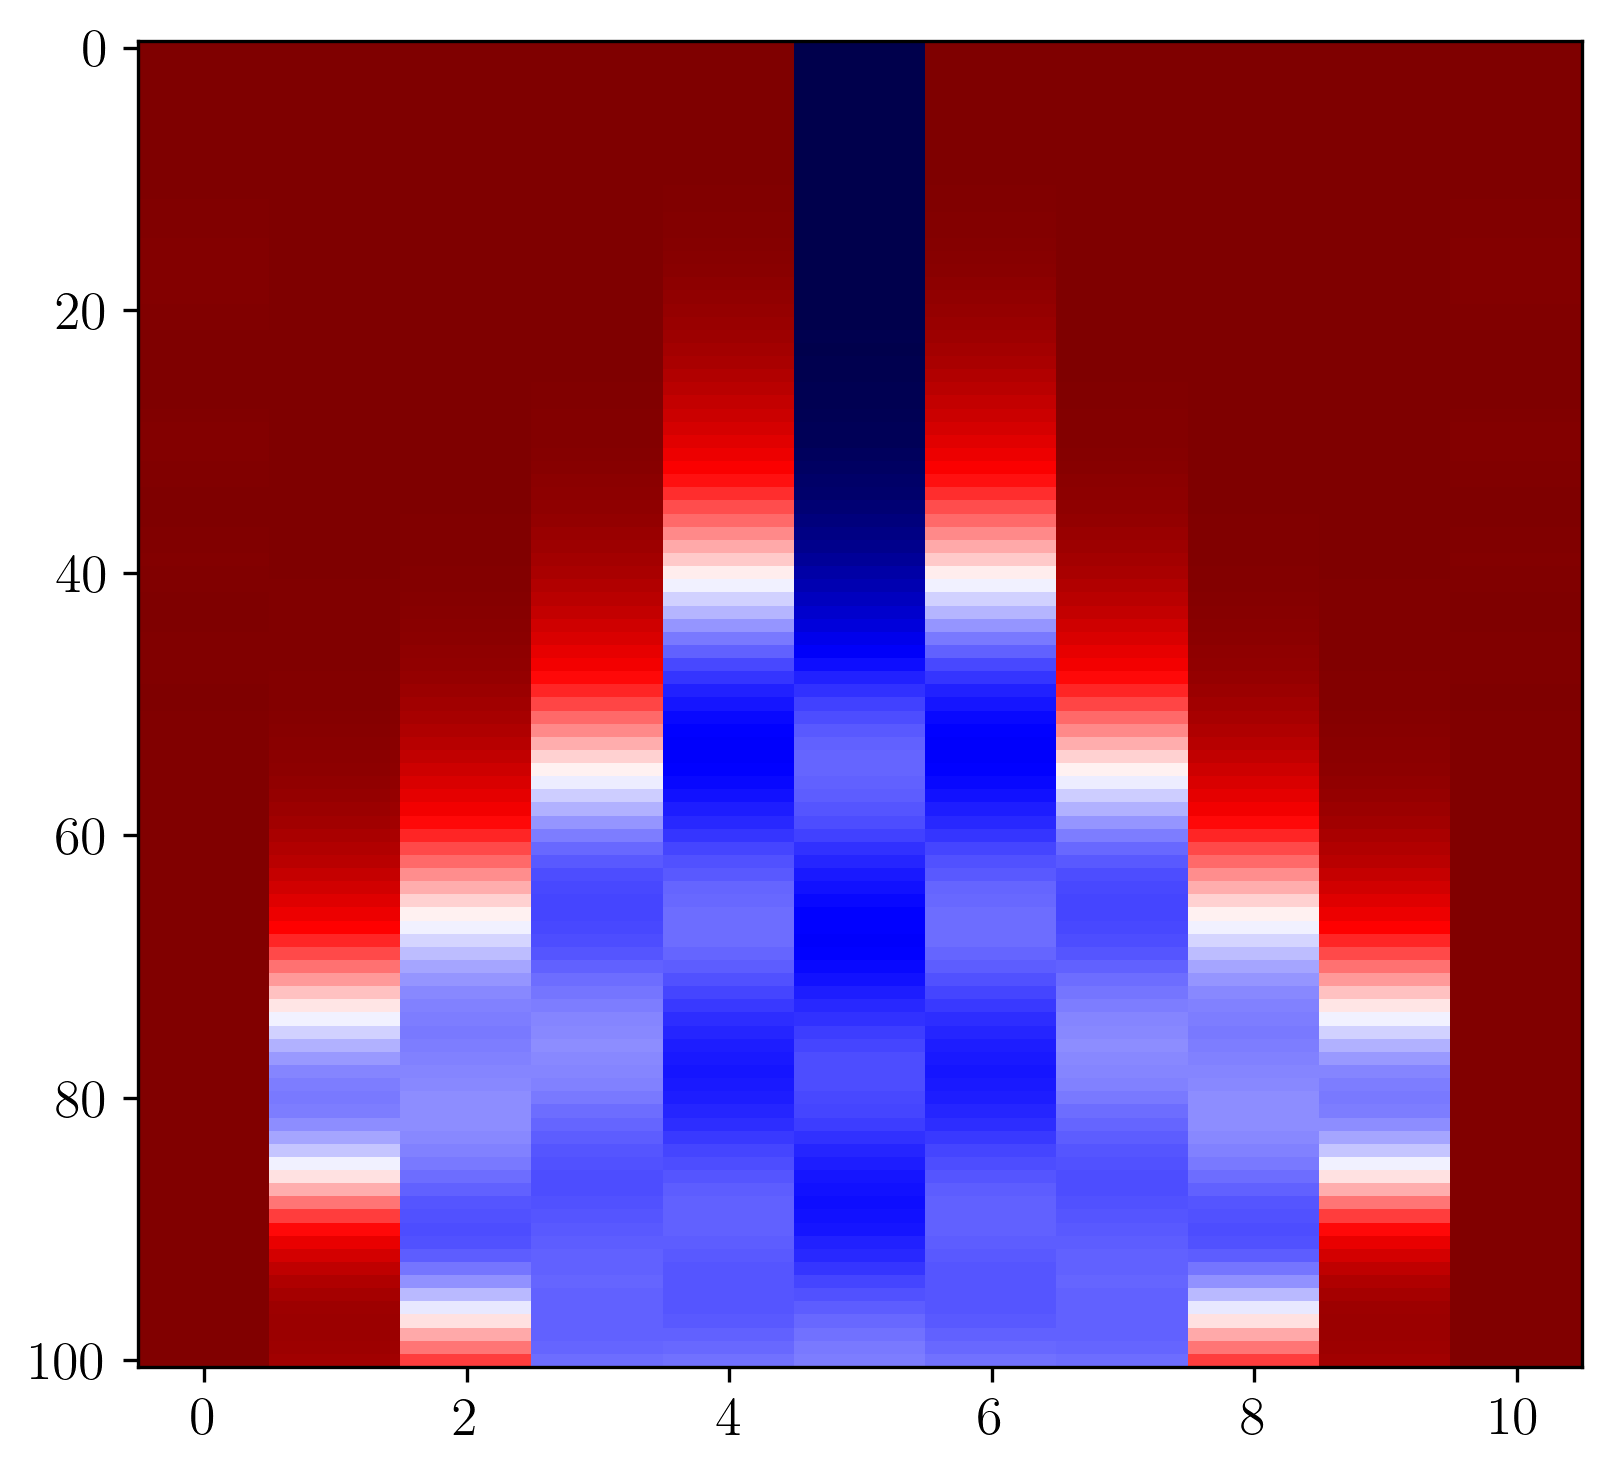

In [22]:
matrix = np.asarray(loc_mag).reshape((trotter_steps+1,L))
plt.imshow(matrix.real, cmap='seismic', aspect=0.1)

## TEBD variational

In [412]:
L = 11
d = 2
model = "Ising"
J = 1
h_l = 1e-5
h_i = 0.0
chi = 50

ising_chain = MPS(L=L, d=d, model=model, chi=chi, J=J, h=h_i, eps=h_l)
ising_chain._random_state(seed=3, type_shape="rectangular", chi=chi)
ising_chain.canonical_form()
ising_chain.DMRG(trunc_chi=True, trunc_tol=False, where=L//2, long="Z", trans="X")
ising_chain.check_canonical(site=1)

Sweep n: 0

Sweep n: 1

the tensor at site 11 is in the correct RFC
the tensor at site 10 is in the correct RFC
the tensor at site 9 is in the correct RFC
the tensor at site 8 is in the correct RFC
the tensor at site 7 is in the correct RFC
the tensor at site 6 is in the correct RFC
the tensor at site 5 is in the correct RFC
the tensor at site 4 is in the correct RFC
the tensor at site 3 is in the correct RFC
the tensor at site 2 is in the correct RFC


In [413]:
Z = np.array([[1,0],[0,-1]])
X = np.array([[0,1],[1,0]])
# ising_chain.order_param_Ising(op=X)
ising_chain.local_param(site=5, op='Z')
ising_chain.mpo_first_moment()

array(1.+0.j)

In [414]:
# ising_chain.flipping_all()
ising_chain.flipping_mps(op="X")
for i in range(L):
    ising_chain.local_param(site=i+1, op='Z')
    print(f"site: {i+1}, {ising_chain.mpo_first_moment()}")
# ising_chain.mpo_first_moment()

site: 1, (1.0000000000000004+0j)
site: 2, (1.0000000000000004+0j)
site: 3, (1.0000000000000004+0j)
site: 4, (1.0000000000000004+0j)
site: 5, (1.0000000000000004+0j)
site: 6, (-1.0000000000000004+0j)
site: 7, (1.0000000000000004+0j)
site: 8, (1.0000000000000004+0j)
site: 9, (1.0000000000000004+0j)
site: 10, (1.0000000000000004+0j)
site: 11, (1.0000000000000004+0j)


In [415]:
npoints = 200
delta = 0.01
h_ev = 1
J_ev = 1
n_sweeps = 8
bond = True
exact = False
obs = ["lm", "losch"]
obs_freq = 1
training = True
chi_max = 200
path_tensor = "D:/projects/0_ISING/"
parent_path = "D:/projects/0_ISING/"
# create a run group for saving observables
h5file = f"{parent_path}/results/results_time_1.hdf5"
params = dict(L=L, delta=delta, 
            T=npoints, of=obs_freq, h_i=h_i, h_ev=h_ev, J_ev=J_ev, chi=chi, chi_max=chi_max)

# run_group = create_run_group(h5file, params)

In [416]:
import datetime as dt

date_start = dt.datetime.now()
print(f"\n*** Starting TEBD evolution in {dt.datetime.now()} ***\n")

# trotter evolution
(errors,
 entropies,
 svs,
 local_magnetization,
 overlaps,
 braket_ex_sp,
 braket_ex_mps,
 braket_mps_sp,
 chi_sat) = ising_chain.TEBD_variational_ising(trotter_steps=npoints,delta=delta,J_ev=J_ev,h_ev=h_ev,n_sweeps=n_sweeps,conv_tol=1e-15,bond=bond,where=L//2,exact=exact,obs=obs,obs_freq=obs_freq,training=training,chi_max=chi_max,path=path_tensor,run_group=run_group,save_file=h5file
    )

t_final = dt.datetime.now() - date_start
print(f"Total time for TEBD evolution of {npoints} trotter steps is: {t_final}")



*** Starting TEBD evolution in 2025-09-25 16:17:16.428205 ***


*** Computing local magnetization in date: 2025-09-25 16:17:16.834711 ***

Total time for the local magnetization is: 0:00:00.572734
overlap [1.+0.j] (1,)

*** Starting the 0-th trotter step in date: 2025-09-25 16:17:17.450810 ***

Sweep n: 0

Sweep n: 1

##############################
The error between the two last updated states converged
to an order of 1e-15 after:
1 sweeps at site 10
total iterations 21
##############################
Bond dim ancilla: 64
Bond dim site: 32
Compress the ising evolution operator: 0:00:00.337882
Total time for the 0-th trotter step is: 0:00:00.337882
saving temporarily the mps at 0-th trotter step...
time for saving: 0:00:02.911394
Computing observables for this trotter step

*** Computing local magnetization in date: 2025-09-25 16:17:20.701033 ***

Total time for the local magnetization is: 0:00:00.185609

*** Starting the 1-th trotter step in date: 2025-09-25 16:17:20.906591 ***

Sweep 

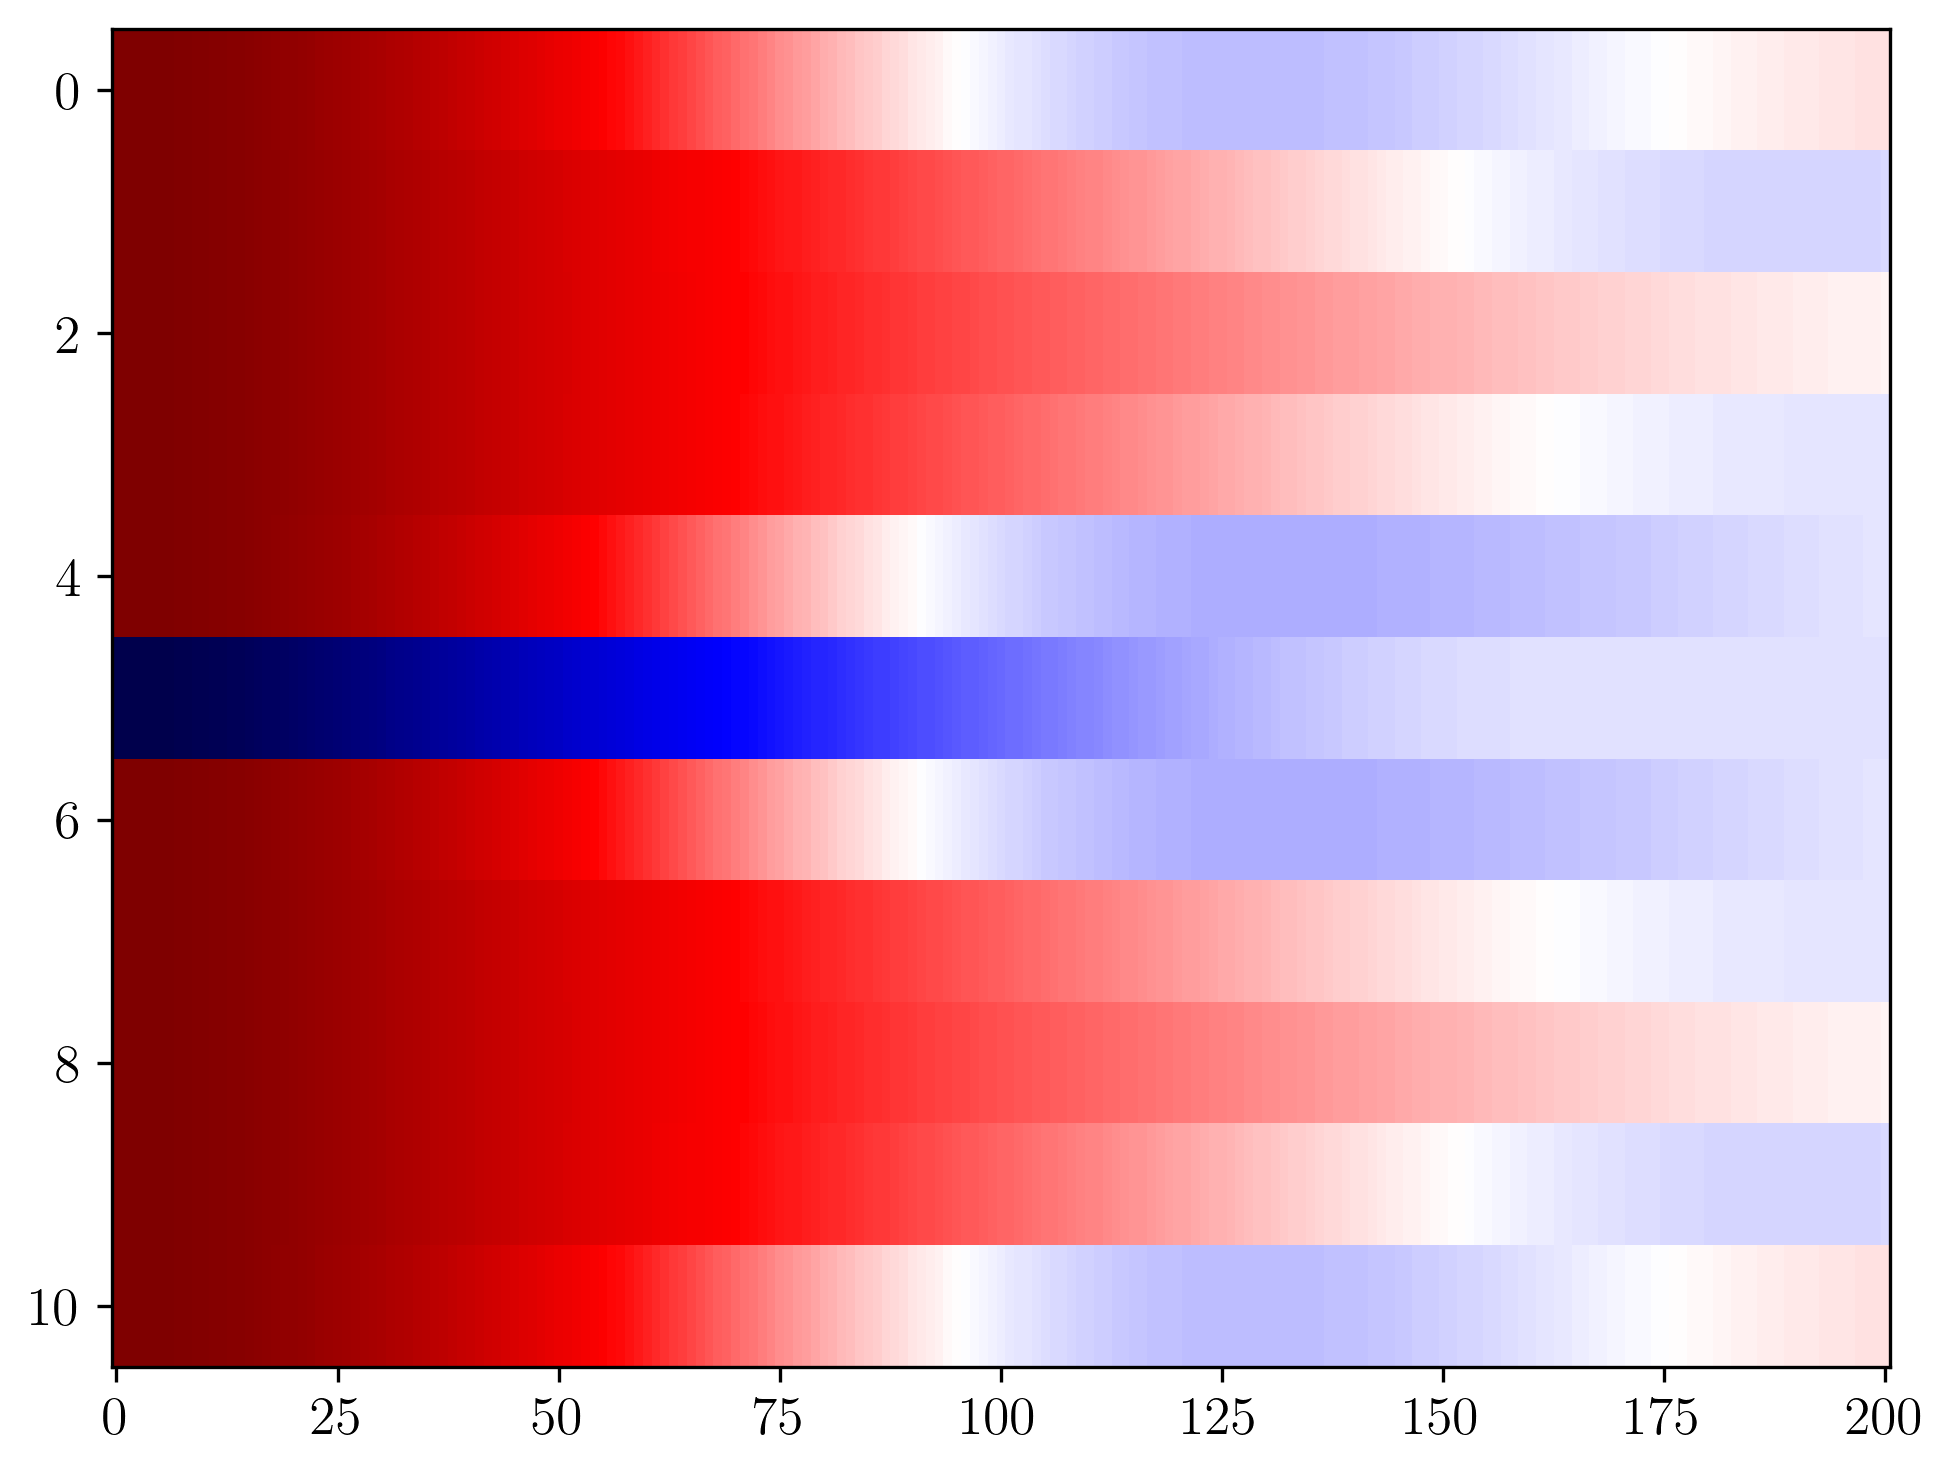

In [406]:
plt.imshow(np.asarray(local_magnetization).reshape(npoints+1,L).T, aspect='auto', cmap="seismic", vmin=-1, vmax=1)

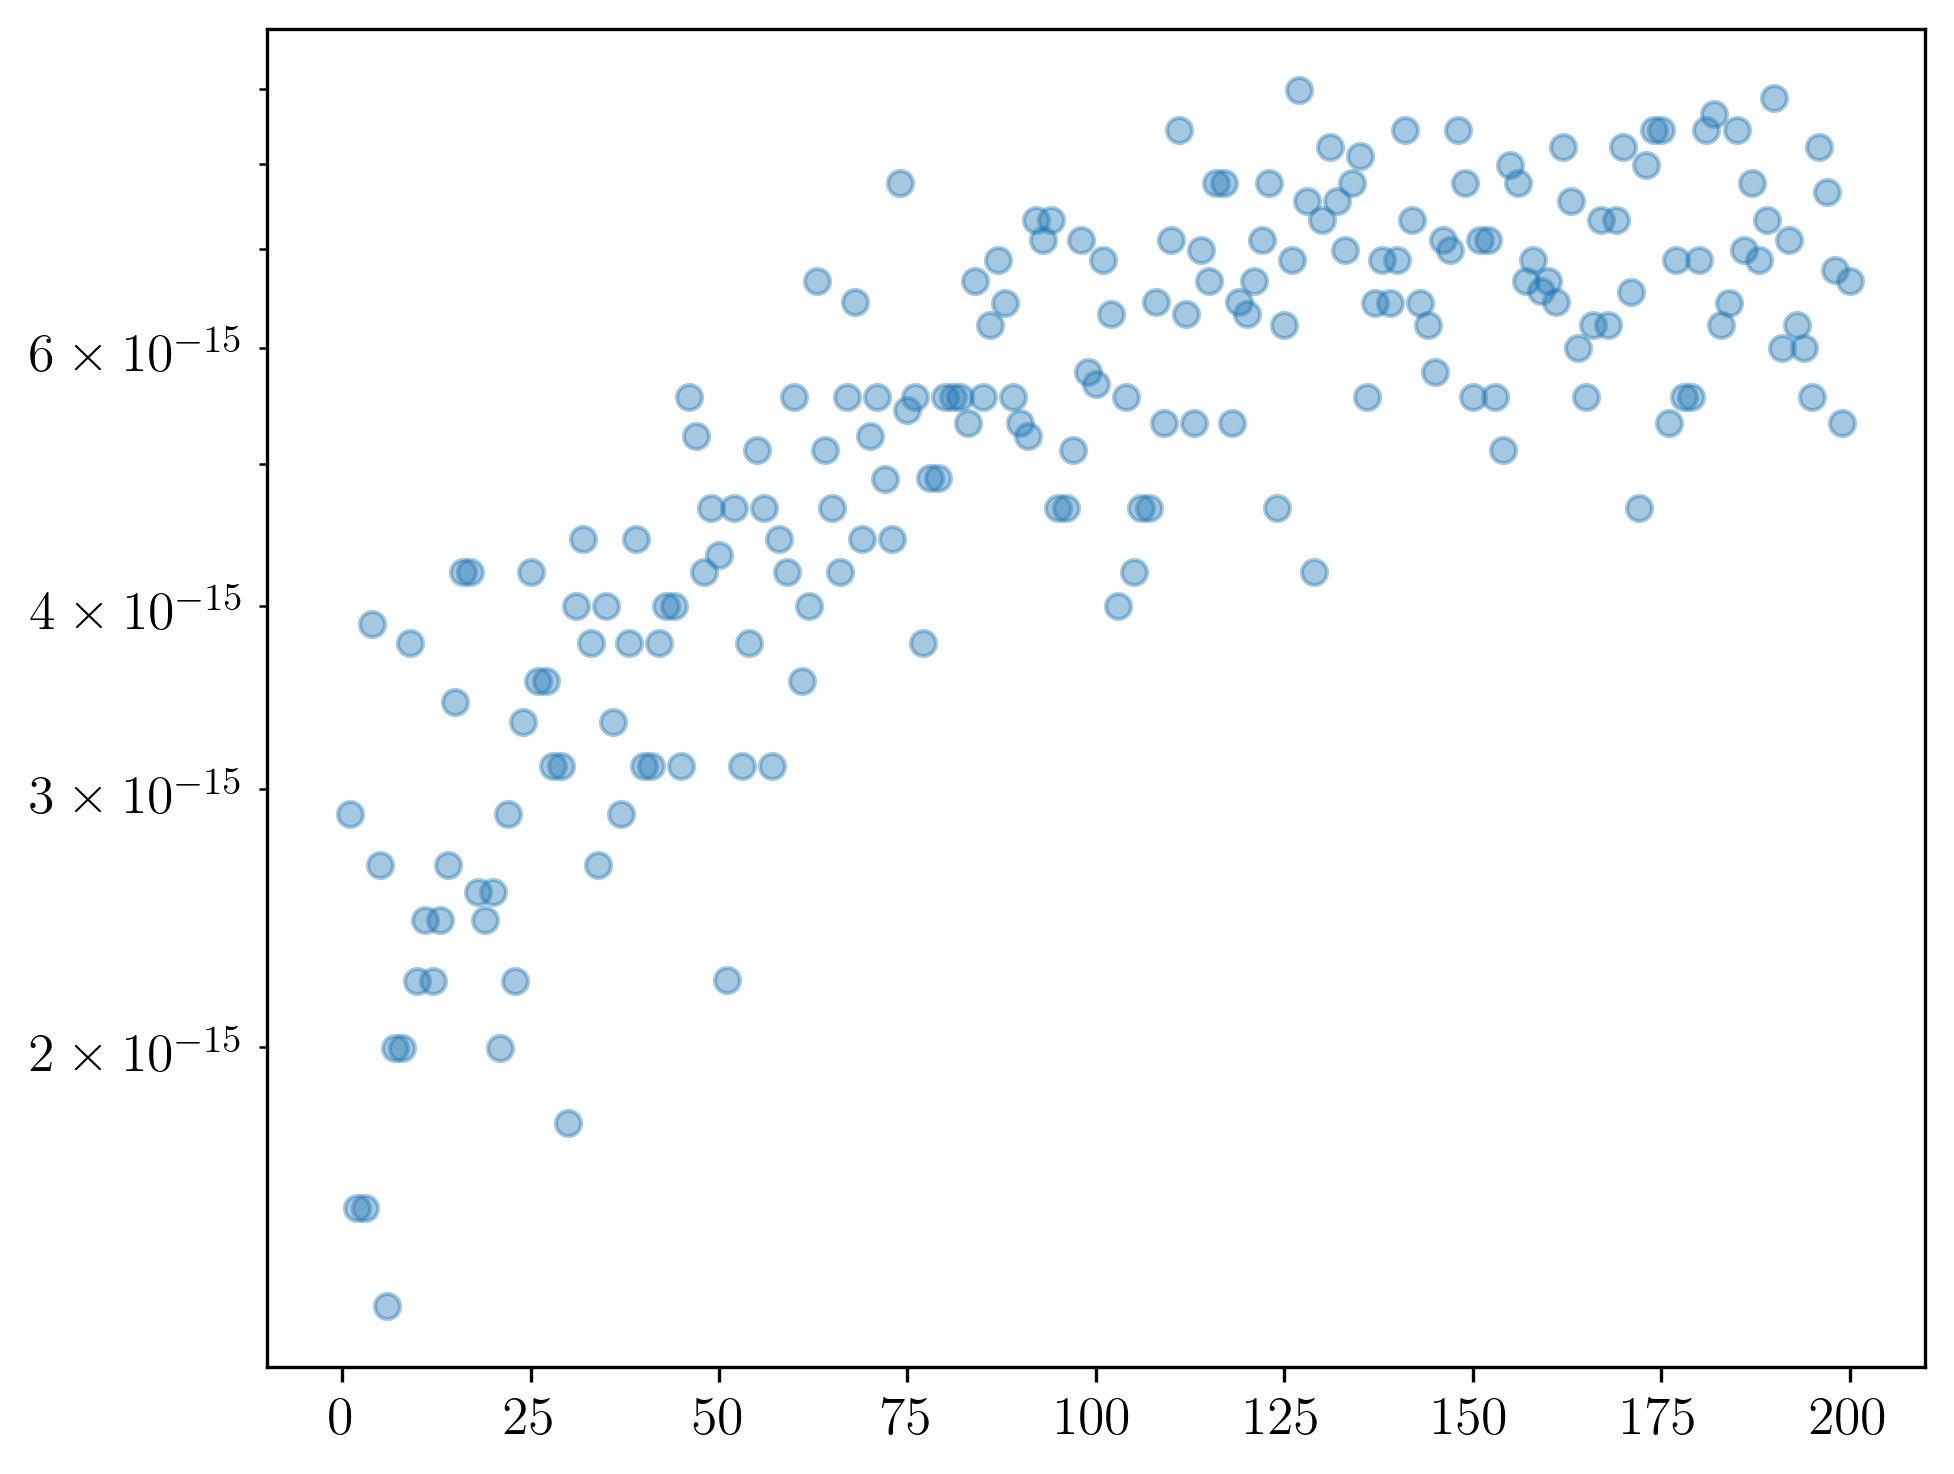

In [407]:
plt.plot([e[-1] for e in errors], 'o', alpha=0.4)
plt.yscale('log')

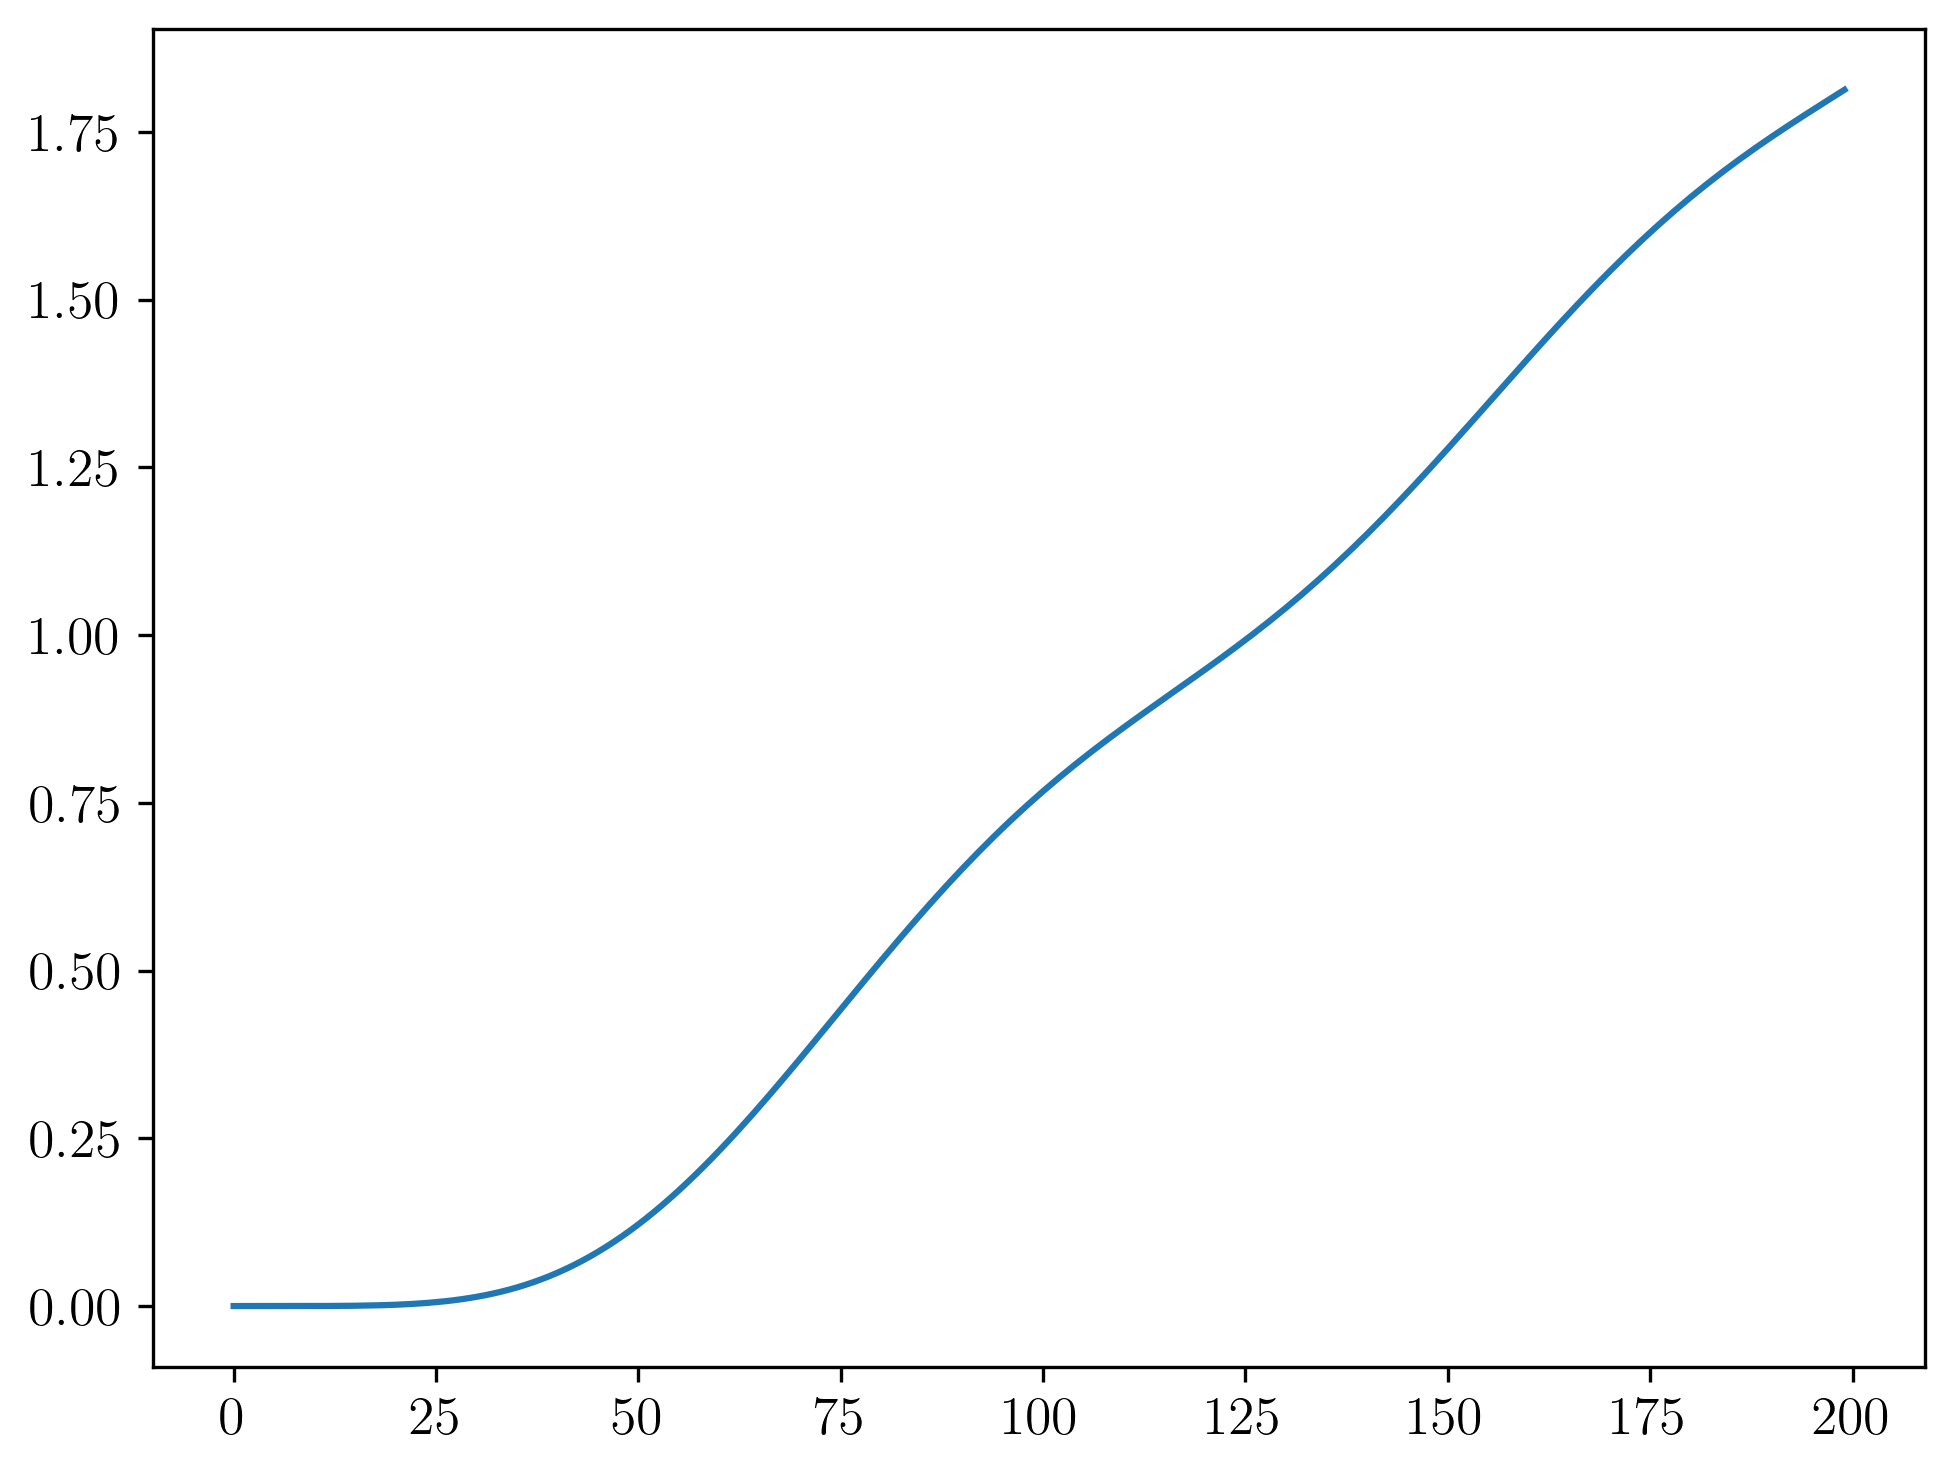

In [408]:
plt.plot([e[0,0] for e in entropies])

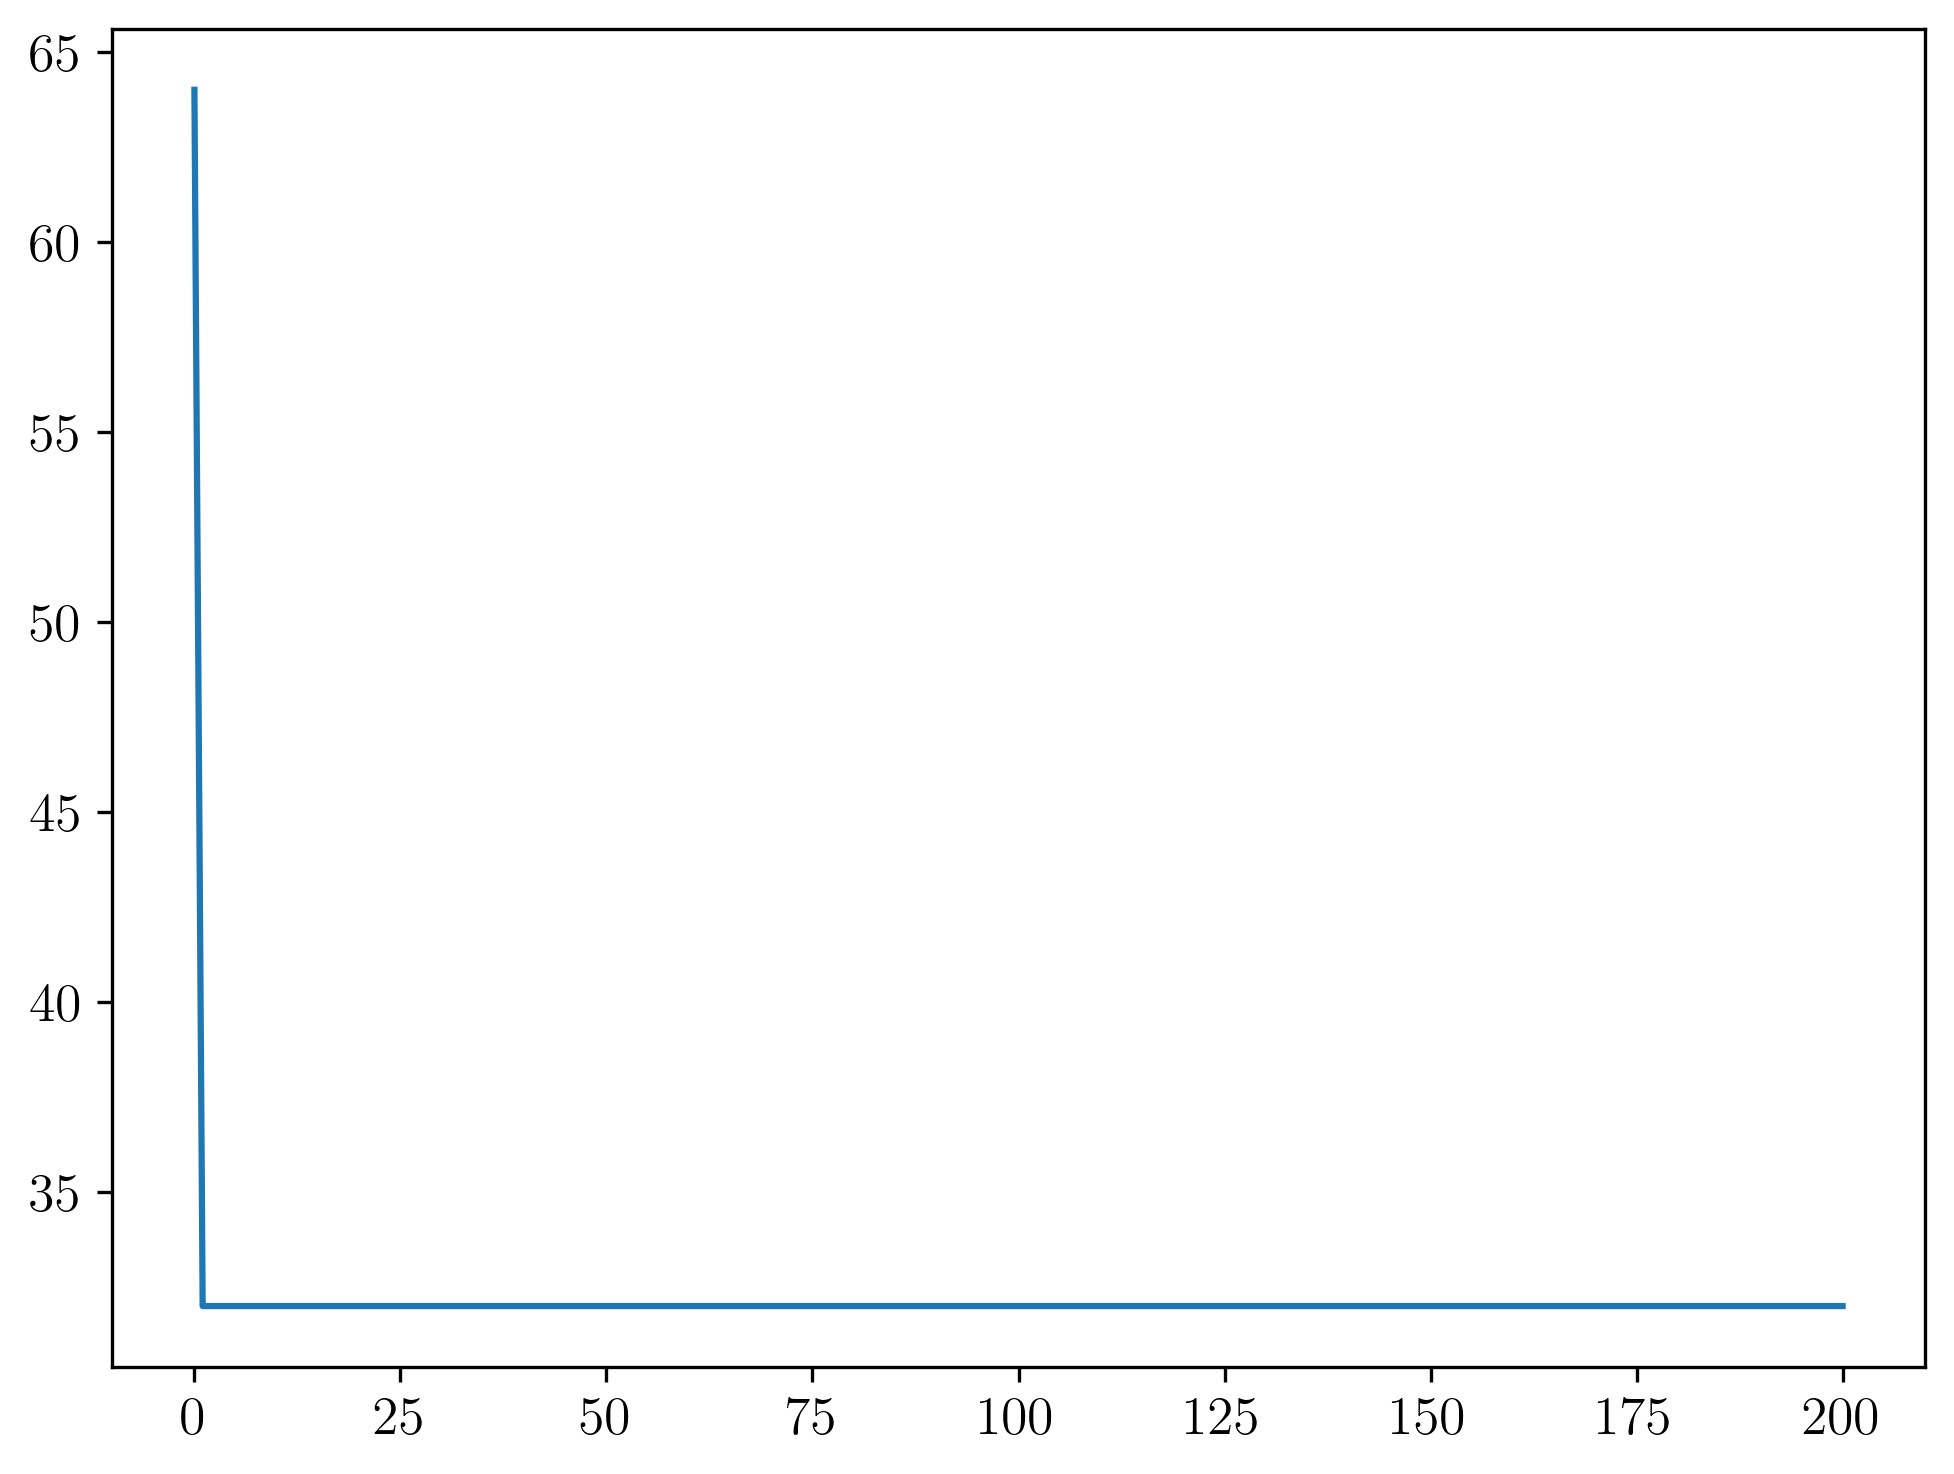

In [409]:
plt.plot(chi_sat)

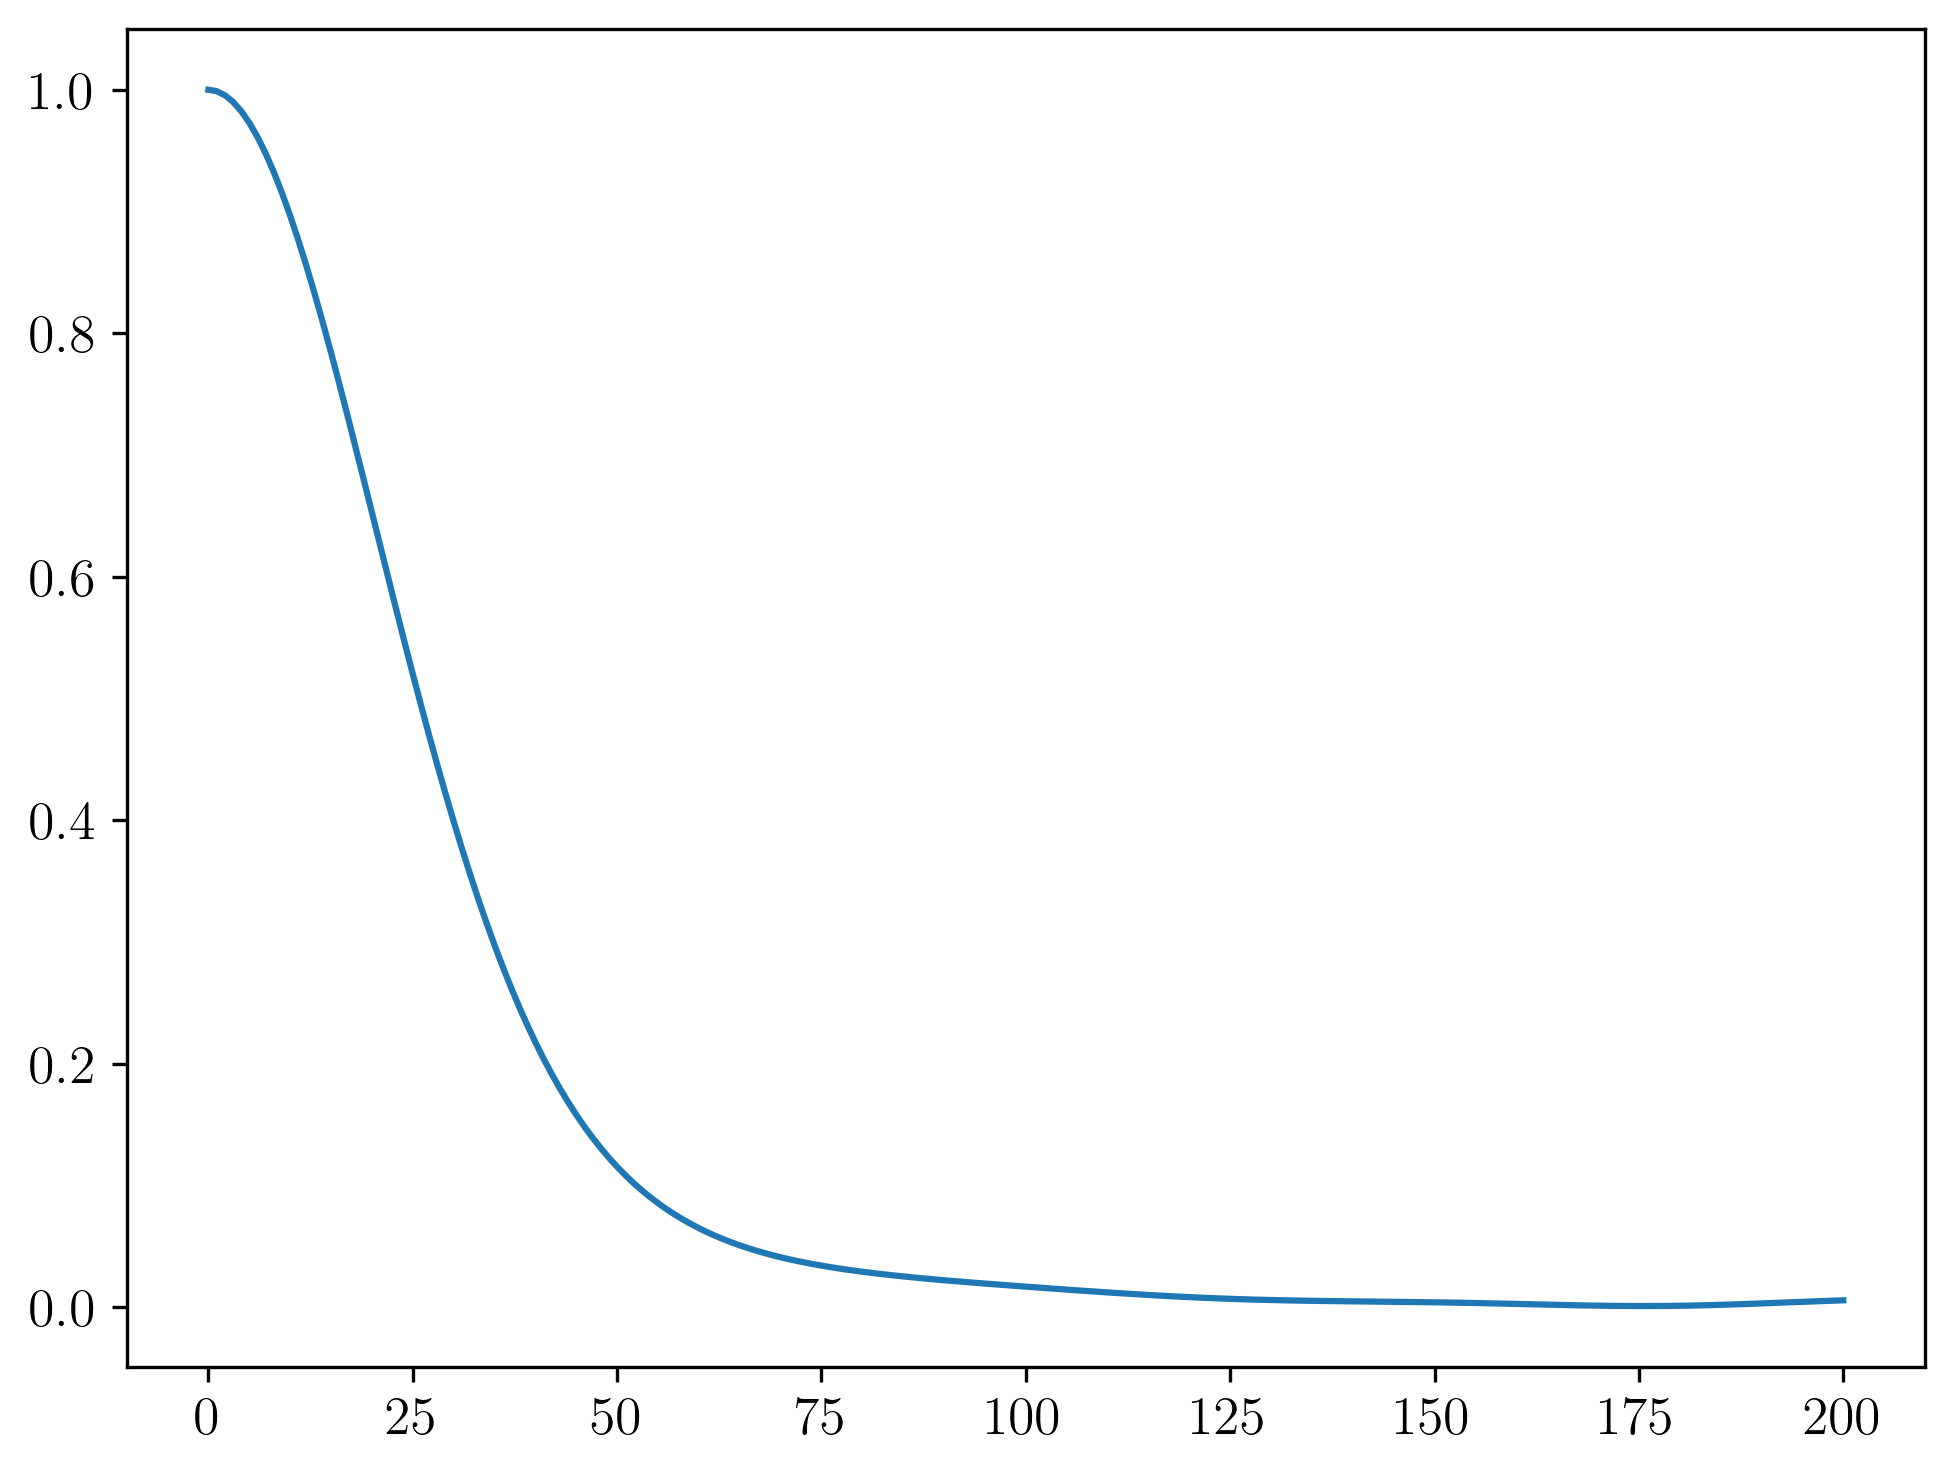

In [418]:
plt.plot(np.abs(overlaps)**2)